In [1]:
install.packages("ggplot2")
library("ggplot2")

Installing package into ‘/home/wojlewy/R/x86_64-pc-linux-gnu-library/3.2’
(as ‘lib’ is unspecified)



The downloaded source packages are in
	‘/tmp/RtmpHqAY46/downloaded_packages’


In [2]:
results = read.csv("results.txt")

In [3]:
results

repeat.,time,size,type
1,0.005501,2000,2
2,0.004784,2000,2
3,0.005102,2000,2
4,0.005014,2000,2
5,0.004691,2000,2
6,0.004693,2000,2
7,0.004980,2000,2
8,0.004797,2000,2
9,0.004993,2000,2
10,0.004729,2000,2


In [4]:
attach(results)

In [5]:
mean_results = aggregate( time ~ size:type, data=results, FUN=mean)
mean_results

size,type,time
10000000,1,0.0135255
20000000,1,0.0268758
30000000,1,0.0411928
40000000,1,0.0536874
50000000,1,0.0672409
2000,2,0.0049284
4000,2,0.0202513
6000,2,0.0476127
8000,2,0.0851036
10000,2,0.1285190


In [6]:
plot_results = mean_results
plot_results$sd = aggregate(time ~ size:type, data=results, FUN=sd)$time
plot_results

size,type,time,sd
10000000,1,0.0135255,0.0005247063
20000000,1,0.0268758,0.0004517469
30000000,1,0.0411928,0.0015435486
40000000,1,0.0536874,0.0005106534
50000000,1,0.0672409,0.0010291326
2000,2,0.0049284,0.0002498489
4000,2,0.0202513,0.0006446072
6000,2,0.0476127,0.0027471754
8000,2,0.0851036,0.0040407212
10000,2,0.1285190,0.0026949478


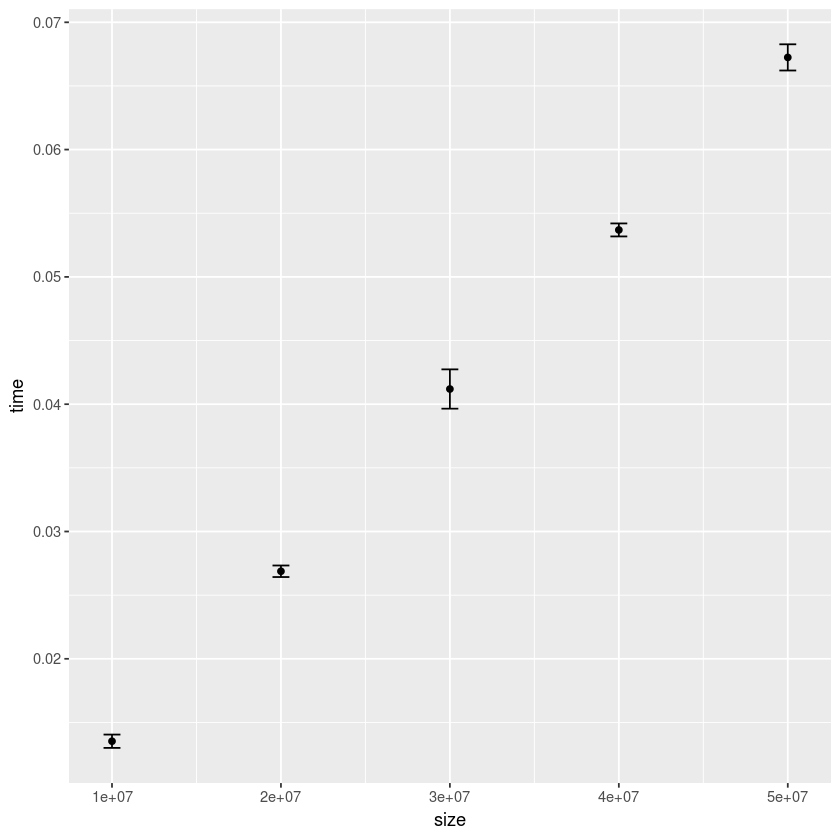

In [25]:
plot1 = ggplot(plot_results[plot_results$type==1,], aes(x=size, y=time)) + geom_errorbar(aes(ymin = time-sd, ymax = time+sd), width=1000000) + geom_point()
plot1

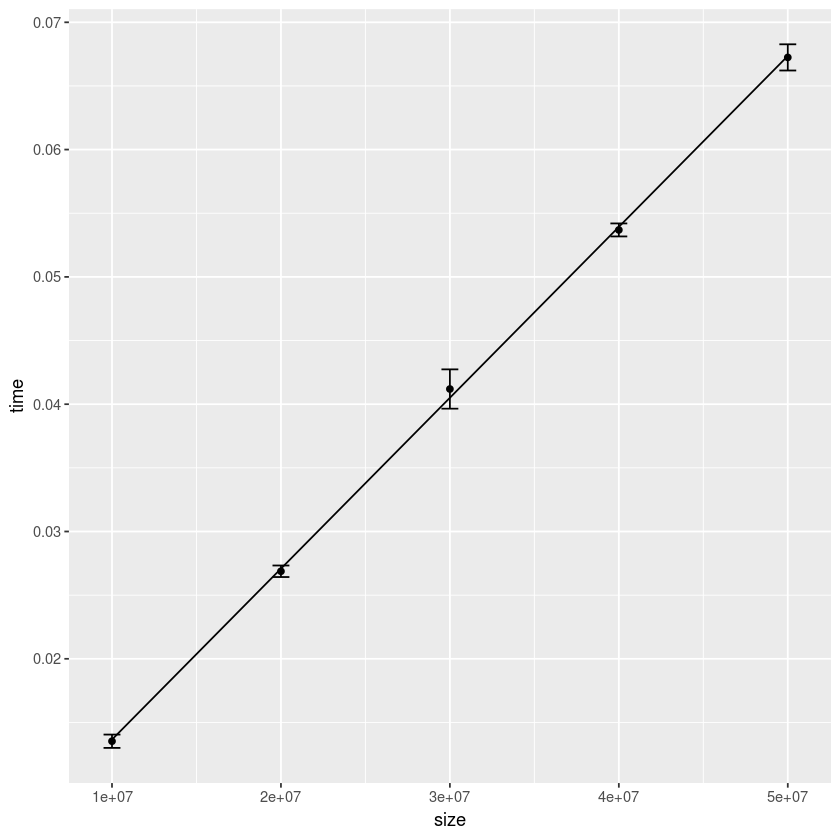

In [26]:
vector_results = plot_results[plot_results$type==1,]
fit1= lm(time ~ poly(size, 1, raw=TRUE), data=vector_results)
helper1 = data.frame(size= seq(1e+07, 5e+07, length.out=10000))
helper1$y = predict(fit1, helper1)
last_plot() +geom_line(data= helper1, aes(size,y))

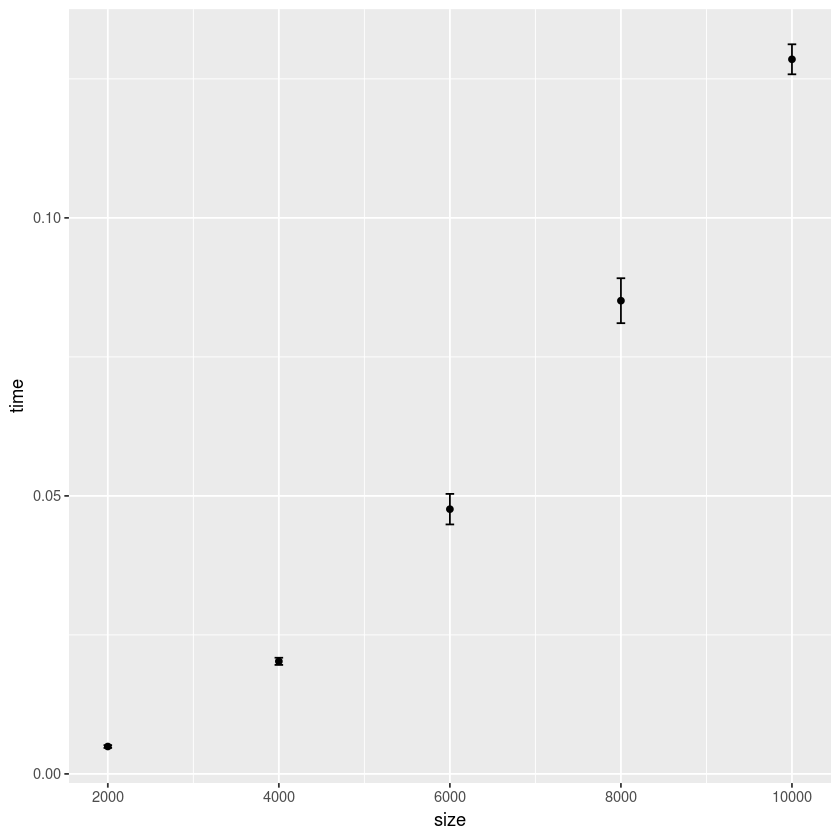

In [21]:
plot2 = ggplot(plot_results[plot_results$type==2,], aes(x=size, y=time)) + geom_errorbar(aes(ymin = time-sd, ymax = time+sd), width=100) + geom_point()
plot2

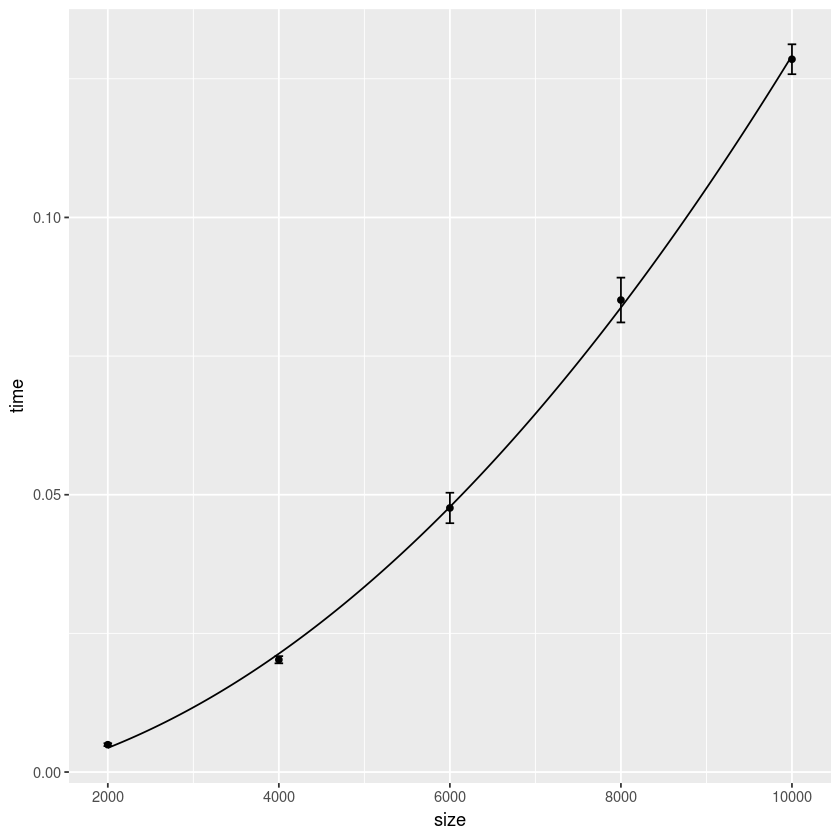

In [22]:
array_results = plot_results[plot_results$type==2,]
fit2= lm(time ~ poly(size, 2, raw=TRUE), data=array_results)
helper2 = data.frame(size= seq(2000, 10000, length.out=8000))
helper2$y = predict(fit2, helper2)
last_plot() + geom_line(data= helper2, aes(size,y))